# Prediction status of Chronic kidney disease (Health care use-case )!!

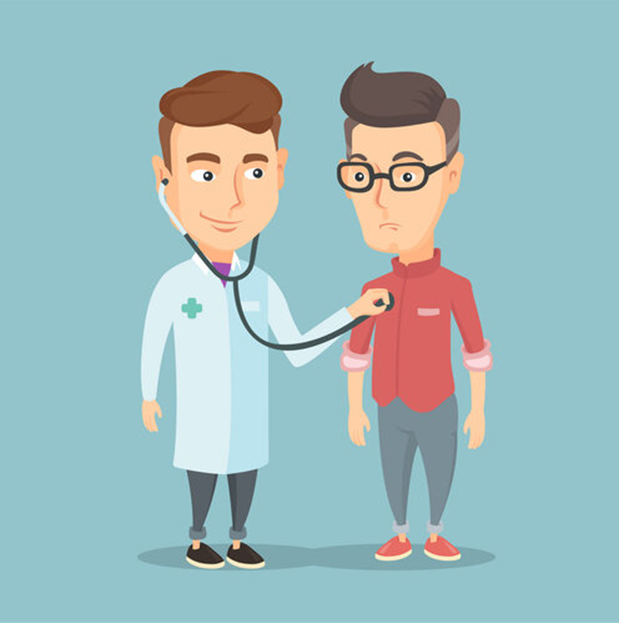

## First Step  I will Prepar data for Analysis & Modelling

In [370]:
# Importing libaraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [371]:
## Importing the dataset
df = pd.read_csv('E:\\kidney_disease.csv')

In [372]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [373]:
df.shape

(400, 26)

### rename column names to make it more user-friendly

In [374]:
columns=pd.read_csv('E:/data_description.txt',sep='-')
columns=columns.reset_index()
columns.columns=['cols','abb_col_names']

In [375]:
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [376]:
df.columns=columns['abb_col_names'].values
df

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# Second step I clean data

### Let's drop the id column. id column is seems to be an unique identifier for each row so we are dropping that it won't help us to find any insights from the data


In [377]:
df.drop(["id"],axis=1,inplace=True) 

In [378]:
df.dtypes

age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

### As it can be seen, red_blood_cell_count, packed_cell_volume and white_blood_cell_count are object type and in data (numerical), so We need to change to numerical dtype.


In [379]:
features=['red blood cell count','packed cell volume','white blood cell count']

In [380]:
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [381]:
for feature in features:
    convert_dtype(df,feature)

### Extract Numerical & Categorical Features

In [382]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [383]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

### Total unique categories in our categorical features to check if any dirtiness in data or not

In [384]:
for col in cat_features:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


 pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary artery disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




   ##### So we need to correct 2 features ['diabetes mellitus'],['coronary artery disease'] and the target variable which contain certain discrepancy in some values.

In [385]:
#Replace incorrect values

df['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary artery disease'] = df['coronary artery disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')

In [386]:
for col in cat_features:
    print('{} has {} values  '.format(col, df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values  


 pus cell has ['normal' 'abnormal' nan] values  


pus cell clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


ypertension has ['yes' 'no' nan] values  


diabetes mellitus has ['yes' 'no' nan] values  


coronary artery disease has ['no' 'yes' nan] values  


appetite has ['good' 'poor' nan] values  


pedal edema has ['no' 'yes' nan] values  


anemia has ['no' 'yes' nan] values  


class has ['ckd' 'notckd'] values  




# Third step  I Analyse Distributions of data

###  Checking features distribution

In [387]:
len(num_features)

14

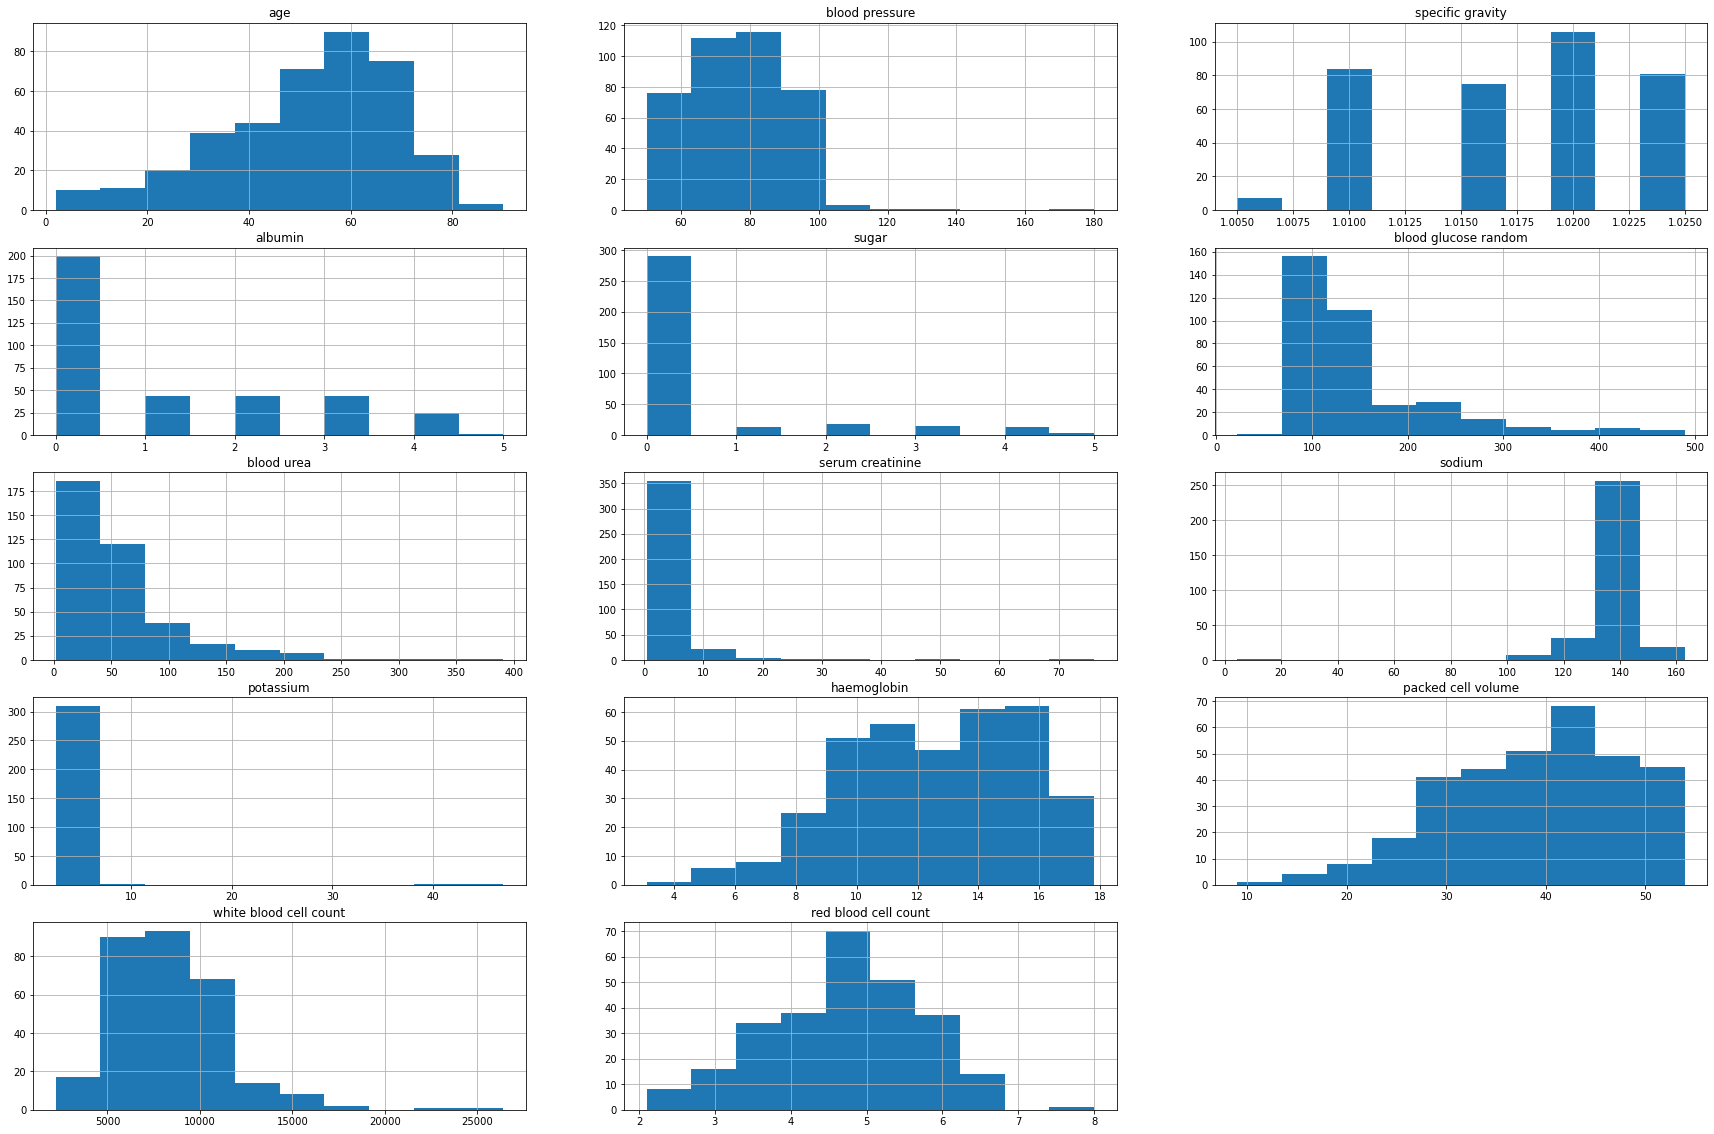

In [388]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_features):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

### Observations:
    1.age looks a bit left skewed
    2.Blood gluscose random is right skewed
    3.Blood Urea is also a bit right skewed
    4.Rest of the features are lightly skewed

### let's check the label distribution for categorical data

In [389]:
len(cat_features)

11

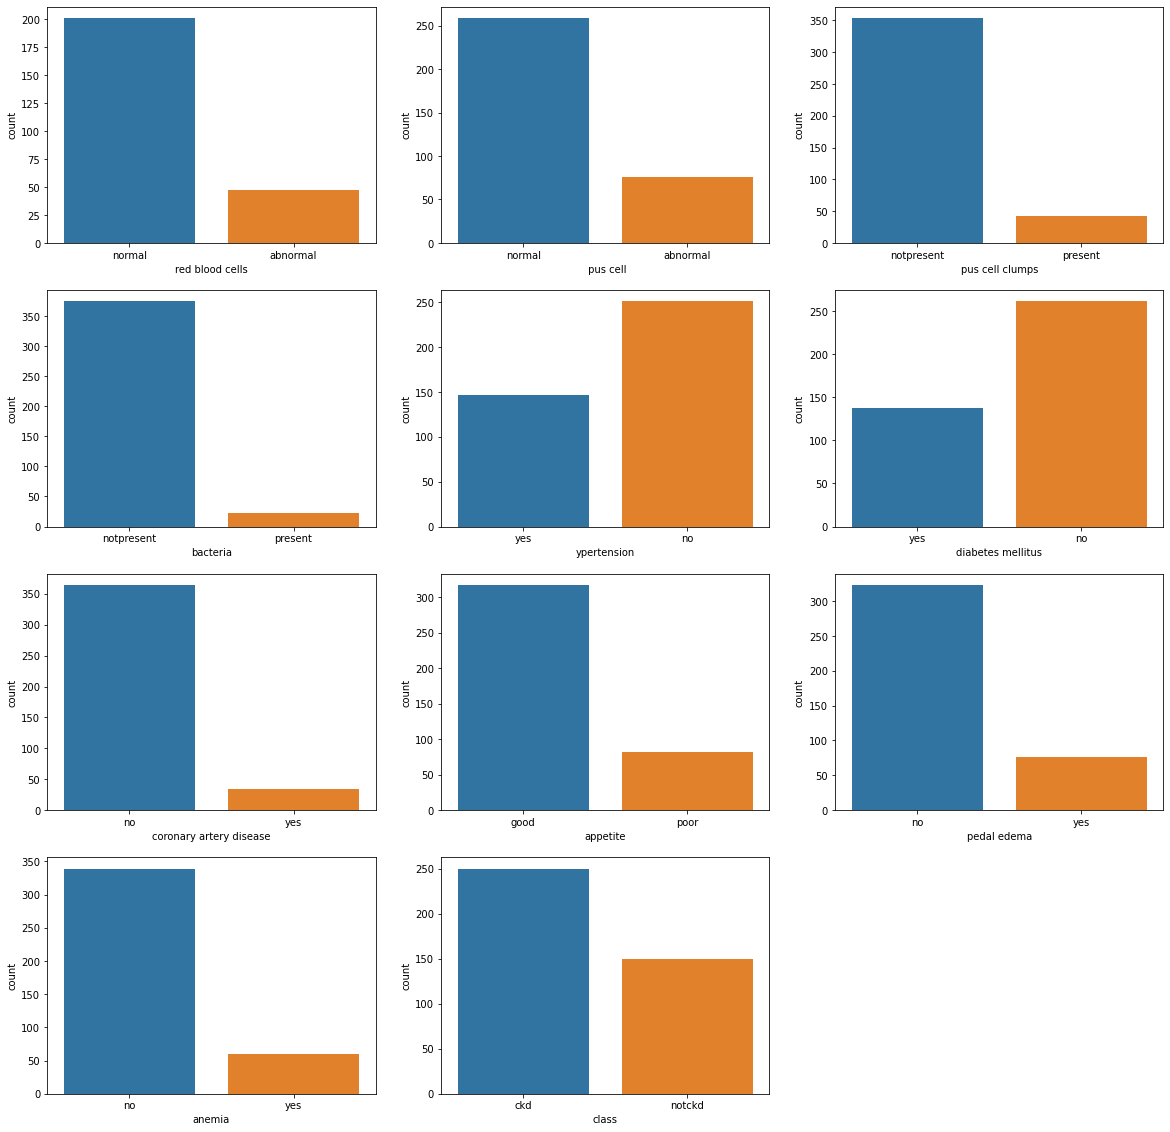

In [390]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_features):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

Text(0.5, 1.0, 'target Class')

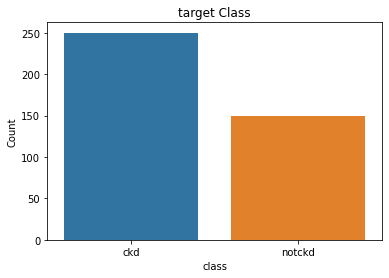

In [391]:
sns.countplot(x='class',data=df)
plt.xlabel("class")
plt.ylabel("Count")
plt.title("target Class")

#### ckd-->>chronic kidney disease
#### notckd-->> not crornic kidney disease

# Forth I check co-relation in data

<AxesSubplot:>

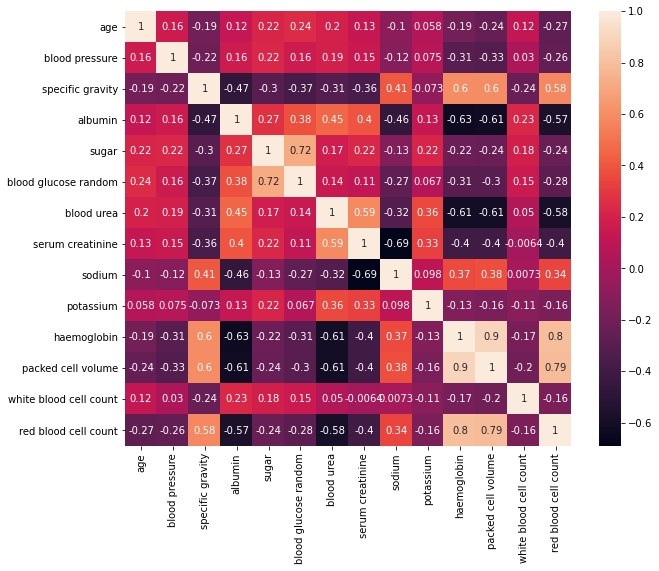

In [392]:
# Correlations
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

## Observations:
Positive Correlation:

Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
Sugar -> Blood glucose random
Blood Urea -> Serum creatinine
Hemoglobin -> Red Blood cell count <- packed cell volume


Negative Correlation:
Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
Serum creatinine -> Sodium

# Fifth step Exploratory Data Analysis on data

### Let's check for Positive correlation and its impact on classes¶

In [393]:
import plotly.express as px

In [394]:
px.violin(df,y='red blood cell count',x="class", color="class")

In [395]:
px.scatter(df,'haemoglobin','packed cell volume')

### Defining violin and scatter plot & kde_plot functions

In [396]:
def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(df, x=col1, y=col2, color="class")
    return fig.show()

def kde_plot(feature):
    grid = sns.FacetGrid(df, hue="class",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

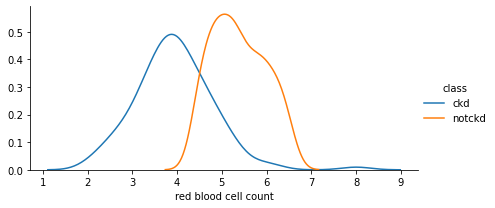

In [397]:
kde_plot('red blood cell count')

#### Both distributions are quite different, distribution CKD is quite normal and evenly distributed but not CKD distribution is a little bit left-skewed but quite close to a normal distribution

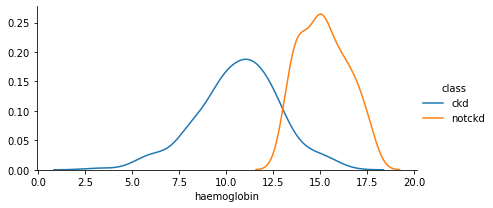

In [398]:
kde_plot('haemoglobin')

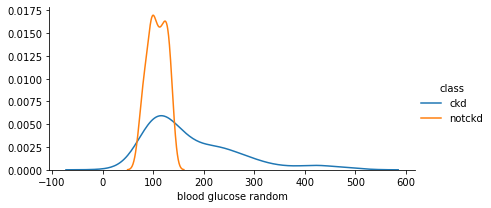

In [399]:
kde_plot('blood glucose random')

In [400]:
scatters('red blood cell count', 'packed cell volume')

In [401]:
scatters('red blood cell count', 'haemoglobin')

In [402]:
scatters('haemoglobin','packed cell volume')

#### 1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
#### disease(i.e ckd).
#### 2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
#### disease(i.e nockd).

In [403]:
violin('red blood cell count')

In [404]:
violin('packed cell volume')

### Now let's check for negative correlation and its impact on classes¶
### Albumin, Blood urea -> Red blood cell count, packed cell volume, Haemoglobin

In [405]:
scatters('red blood cell count','albumin')

  #### Clearly, albumin levels of above 0 affect ckd largely


In [406]:
scatters('packed cell volume','blood urea')

#### Packed cell volume >= 40 largely affects to be non ckd

In [407]:
fig = px.bar(df, x="specific gravity", y="packed cell volume",
             color='class', barmode='group',
             height=400)
fig.show()

   ### Clearly, specific gravity >=1.02 affects non ckd

# Sixth I Clean missing values 

In [408]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
class                        0
dtype: int64

 ### I Clean missing values using Random Value Imputation Because missing values is high in most features and This the best way to To maintain distrbuation For each feature.

In [409]:
data=df.copy()

In [410]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [411]:
for col in num_features:
    Random_value_imputation(col)

In [412]:
data[num_features].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

### As rest of the features has less missing values,so I can fill it using mode concept(categorical data)

In [413]:
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [414]:
for col in cat_features:
    impute_mode(col)

In [415]:
data[cat_features].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

# Seventh I Apply feature Encoding on data

In [416]:
for col in cat_features:
    print('{} has {} categories'.format(col, data[col].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 2 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


#### As we have just 2 categories in each feature then we can consider Label Encoder as it will not cause Curse of Dimensionality

In [417]:
from sklearn.preprocessing import LabelEncoder

In [418]:
le = LabelEncoder()

In [419]:
for col in cat_features:
    data[col]=le.fit_transform(data[col])

In [420]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,80.0,...,38.0,6000.0,6.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.6,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


### separate dependent & independent features

In [421]:
y=data['class']
X=data.drop('class',axis=1)
cols=X.columns
cols

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia'],
      dtype='object')

# eighth I Select best features for model

In [422]:
# Import Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_classif 

In [423]:
print('Original X Shape is ' , X.shape)

Original X Shape is  (400, 24)


In [424]:
## Feature Selection by KBest 
FeatureSelection = SelectKBest(score_func= chi2 ,k=10) # score_func can = f_classif 
X = FeatureSelection.fit_transform(X, y)

In [425]:
#showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

X Shape is  (400, 10)
Selected Features are :  [ True False False  True  True False False False False  True  True  True
 False False  True  True  True False  True False False False False False]


In [426]:
# let's print the number of total and selected features
FeatureSelection = cols[(FeatureSelection.get_support())]

In [427]:
# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(FeatureSelection)))

total features: 10
selected features: 10


In [428]:
FeatureSelection

Index(['age', 'albumin', 'sugar', 'blood glucose random', 'blood urea',
       'serum creatinine', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'ypertension'],
      dtype='object')

# Ninth Building a Cross-validated Model & checking its accuracy

In [429]:
#Import Libraries
from sklearn.model_selection import train_test_split

In [430]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [431]:
#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (268, 10)
X_test shape is  (132, 10)
y_train shape is  (268,)
y_test shape is  (132,)


### Lets find best model using Hyperparameter optimization

In [432]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [433]:
## Hyper Parameter Optimization with respect to XGBoost
params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [434]:
from sklearn.model_selection import RandomizedSearchCV

In [435]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [436]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [437]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[07:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    3.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.1s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [438]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [439]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [440]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)
## we have got this model on the basis of cross valudation & hyper-parameter optimization

In [441]:
classifier.fit(X_train,y_train)

[07:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [442]:
y_pred=classifier.predict(X_test)

#### Calculating Confusion Matrix

In [443]:
#Import Libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [444]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[71  2]
 [ 1 58]]


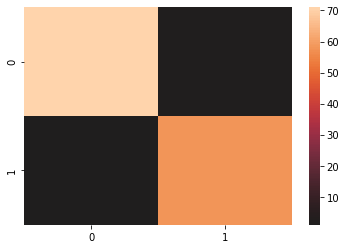

In [445]:
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

#### Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))

In [446]:
#Import Libraries
from sklearn.metrics import accuracy_score

In [447]:
AccScore = accuracy_score(y_test, y_pred)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.9772727272727273


In [448]:
#Import Libraries
from sklearn.metrics import mean_squared_error 

In [449]:
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  0.022727272727272728


# WOW!, It Was a Great Accuracy.